# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\omarr\AppData\Local\Temp\pip-install-0m7xc1us\tensorflow-gpu_4b2fb2a230a8456a87fd0c71a36fedb1\setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-e

In [2]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      1.4.0
aniso8601                    8.0.0
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
asttokens                    2.0.7
astunparse                   1.6.3
attrs                        22.1.0
autopep8                     1.7.0
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
cachetools                   5.3.0
certifi                      2022.9.24
cffi                         1.15.1
charset-normalizer           2.1.1
click                        7.1.2
colorama                     0.4.5
cryptography                 38.0.3
cycler                       0.11.0
debugpy                      1.6.2
decorator                    5.1.1
defusedxml                   0.7.1
entrypoints                  0.4
executing                    0.10.0
fastjsonschema               2.16.1
Flask                        1.1.2
F

In [3]:
import tensorflow as tf
import os

In [4]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"  # Replace '0' with the ID of your GPU

# 2. Remove dodgy images

In [12]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [10]:
data_dir = 'data' 

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

(3744, 5616, 3)


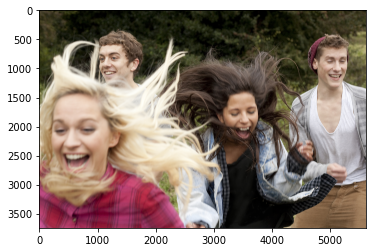

In [21]:
img = cv2.imread(os.path.join('data', 'happy', '154006829.jpg'))
print(img.shape)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [23]:
import numpy as np
from matplotlib import pyplot as plt

In [24]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [25]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [26]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

In [34]:
print(batch)
print(batch[0].shape)

(array([[[[  4.      ,   4.      ,   4.      ],
         [  4.      ,   4.      ,   4.      ],
         [  4.      ,   4.      ,   4.      ],
         ...,
         [  3.      ,   3.      ,   3.      ],
         [  3.      ,   3.      ,   3.      ],
         [  4.      ,   4.      ,   4.      ]],

        [[  4.      ,   4.      ,   4.      ],
         [  4.      ,   4.      ,   4.      ],
         [  4.      ,   4.      ,   4.      ],
         ...,
         [  3.      ,   3.      ,   3.      ],
         [  3.      ,   3.      ,   3.      ],
         [  4.      ,   4.      ,   4.      ]],

        [[  4.      ,   4.      ,   4.      ],
         [  4.      ,   4.      ,   4.      ],
         [  4.      ,   4.      ,   4.      ],
         ...,
         [  3.      ,   3.      ,   3.      ],
         [  3.      ,   3.      ,   3.      ],
         [  4.      ,   4.      ,   4.      ]],

        ...,

        [[  5.      ,   5.      ,   5.      ],
         [  5.      ,   5.      ,   5.      

In [31]:
batch[1]

array([1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

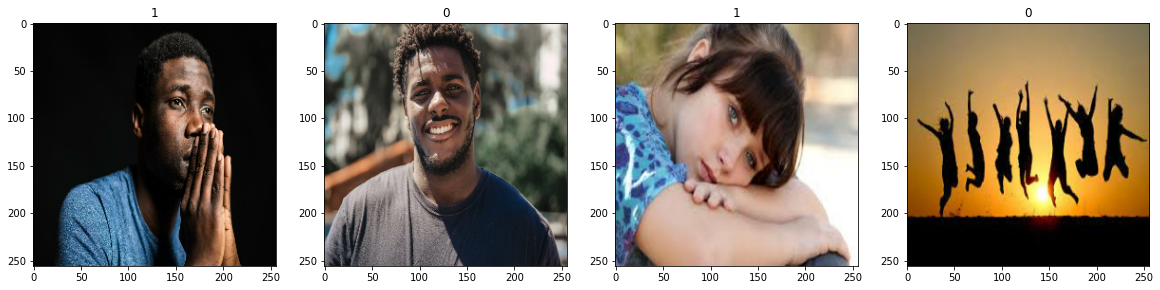

In [32]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [35]:
data = data.map(lambda x,y: (x/255, y))

In [41]:
data.as_numpy_iterator().next()

(array([[[[0.7990464 , 0.7951248 , 0.7872817 ],
          [0.7981005 , 0.7941789 , 0.78633577],
          [0.7973652 , 0.7934436 , 0.7856005 ],
          ...,
          [0.70155865, 0.6976371 , 0.68979394],
          [0.8274491 , 0.8235275 , 0.8156844 ],
          [0.72919154, 0.72527   , 0.71742684]],
 
         [[0.795301  , 0.79137945, 0.7835363 ],
          [0.7949755 , 0.79105395, 0.7832108 ],
          [0.7953604 , 0.7914388 , 0.7835957 ],
          ...,
          [0.66677004, 0.6628485 , 0.65500534],
          [0.8189932 , 0.81507164, 0.8072285 ],
          [0.68551624, 0.68159467, 0.67375153]],
 
         [[0.78866994, 0.7847484 , 0.77690524],
          [0.79992914, 0.7960076 , 0.78816444],
          [0.7960459 , 0.79212433, 0.7842812 ],
          ...,
          [0.67494065, 0.6710191 , 0.66317594],
          [0.78355354, 0.779632  , 0.77178884],
          [0.7152344 , 0.71131283, 0.7034697 ]],
 
         ...,
 
         [[0.9576651 , 0.9537435 , 0.9459004 ],
          [0.96421

# 5. Split Data

In [47]:
len(data)

10

In [48]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [49]:
train_size

7

In [50]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [51]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [53]:
model = Sequential()

In [54]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [55]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [57]:
logdir='logs'

In [58]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [59]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 [==============================] - 9s 1s/step - loss: 1.1123 - accuracy: 0.4955 - val_loss: 0.6698 - val_accuracy: 0.5625
Epoch 2/20
7/7 [==============================] - 8s 973ms/step - loss: 0.6903 - accuracy: 0.5759 - val_loss: 0.7345 - val_accuracy: 0.4062
Epoch 3/20
7/7 [==============================] - 8s 965ms/step - loss: 0.6619 - accuracy: 0.6607 - val_loss: 0.6249 - val_accuracy: 0.7031
Epoch 4/20
7/7 [==============================] - 8s 1s/step - loss: 0.5878 - accuracy: 0.6964 - val_loss: 0.5808 - val_accuracy: 0.7188
Epoch 5/20
7/7 [==============================] - 8s 978ms/step - loss: 0.5254 - accuracy: 0.7589 - val_loss: 0.4687 - val_accuracy: 0.8125
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 0.4354 - accuracy: 0.8214 - val_loss: 0.3119 - val_accuracy: 0.9062
Epoch 7/20
7/7 [==============================] - 8s 991ms/step - loss: 0.3829 - accuracy: 0.8393 - val_loss: 0.2977 - val_accuracy: 0.9062
Epoch 8/20
7/7 [=============

# 8. Plot Performance

In [67]:
hist.history

{'loss': [1.1123439073562622,
  0.6903018355369568,
  0.6619000434875488,
  0.5878204703330994,
  0.5253588557243347,
  0.4353523552417755,
  0.38289138674736023,
  0.2658049464225769,
  0.21988627314567566,
  0.22106359899044037,
  0.1287093609571457,
  0.17483605444431305,
  0.12872792780399323,
  0.05989370495080948,
  0.03880957514047623,
  0.06580914556980133,
  0.07829046994447708,
  0.04211005941033363,
  0.027626795694231987,
  0.023868011310696602],
 'accuracy': [0.4955357015132904,
  0.5758928656578064,
  0.6607142686843872,
  0.6964285969734192,
  0.7589285969734192,
  0.8214285969734192,
  0.8392857313156128,
  0.9285714030265808,
  0.9285714030265808,
  0.9151785969734192,
  0.96875,
  0.9419642686843872,
  0.9598214030265808,
  0.9866071343421936,
  0.9821428656578064,
  0.9776785969734192,
  0.9821428656578064,
  0.9866071343421936,
  0.9910714030265808,
  0.9955357313156128],
 'val_loss': [0.6697953939437866,
  0.7344934344291687,
  0.624874472618103,
  0.58082520961761

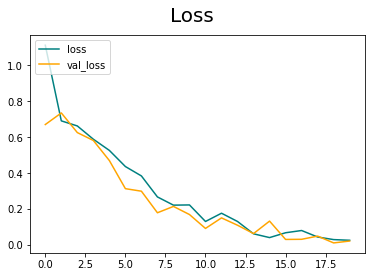

In [64]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

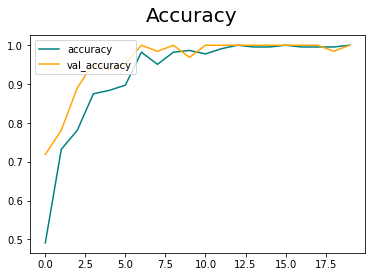

In [28]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [68]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [69]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [70]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 257ms/step


In [72]:
print(f'percision: {pre.result()}, recall: {re.result()}, accuracy: {acc.result()}')

percision: 1.0, recall: 1.0, accuracy: 1.0


# 10. Test

In [73]:
import cv2

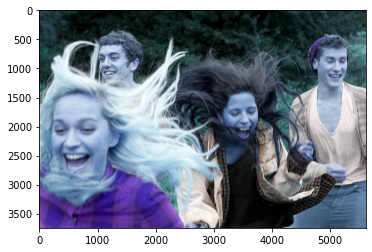

In [74]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

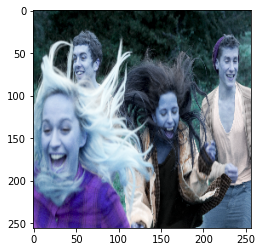

In [75]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [76]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 55ms/step


In [77]:
yhat

array([[0.2376232]], dtype=float32)

In [80]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [78]:
from tensorflow.keras.models import load_model

In [83]:
model.save(os.path.join('models','imageclassifier.h5'))

In [85]:
new_model = load_model('models/imageclassifier.h5')

In [86]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 176ms/step


array([[0.2376232]], dtype=float32)